# ESCUELA POLITECNICA NACIONAL
## PROYECTO PRIMER BIMERSTRE
### Alex Francisco Carrera Alvarez

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [5]:
path = 'C://Users/LaLeS/Desktop/Proyecto Python/data/master.csv'

In [6]:
lista = pd.read_csv(
        path
        )

**TEMA: “SUICIDIOS DESDE 1985 HASTA 2016”**

**OBJETIVOS:**

-   Conocer los factores que han aportado a los suicidios a nivel mundial de manera de tener una idea clara sobre los riesgos que llevan a las personas a cometer suicidios en las diferentes partes del mundo

-   Verificar las estadisticas a nivel mundial y compararlas por año de manera que se determinen cuales factores influyen a un comportamiento que podria llevar a suicidios.

-   Conocer la tasa de mortalidad que se presenta en el mundo y estadisticamente determinar si la mayor cantidad de suicidios se da en hombres o en mujeres.

-   Conocer los paises que presentan mayor cantidad de suicidios y determinar los factores que hacen relevantes su alto numero en cada año

**Desarrollo:**

Datos obtenidos a partir del siguiente enlace ¨https://datos.bancomundial.org/indicador/SH.STA.SUIC.P5¨

In [7]:
lista = lista.sort_values('year')
lista = lista.reset_index(drop=True)

In [10]:
lista

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Saint Vincent and Grenadines,1985,male,35-54 years,2,6100,32.79,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,Silent
1,Saint Vincent and Grenadines,1985,female,55-74 years,0,4100,0.00,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,G.I. Generation
2,Saint Vincent and Grenadines,1985,female,75+ years,0,1000,0.00,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,G.I. Generation
3,Saint Vincent and Grenadines,1985,male,15-24 years,0,12100,0.00,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,Generation X
4,Saint Vincent and Grenadines,1985,male,25-34 years,0,9300,0.00,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Croatia,2016,male,35-54 years,146,571003,25.57,Croatia2016,NaN,"51,338,524,831",12905,Generation X
27816,Netherlands,2016,female,15-24 years,35,1025443,3.41,Netherlands2016,NaN,"777,227,541,581",48108,Millenials
27817,Netherlands,2016,female,25-34 years,65,1043372,6.23,Netherlands2016,NaN,"777,227,541,581",48108,Millenials
27818,Czech Republic,2016,female,75+ years,25,480884,5.20,Czech Republic2016,NaN,"195,305,084,919",19505,Silent


In [8]:
lista_primeros = lista.filter(items = ["country","year"]).sort_values('country', ascending=False).head(10)

Text(0, 0.5, 'Suicidios')

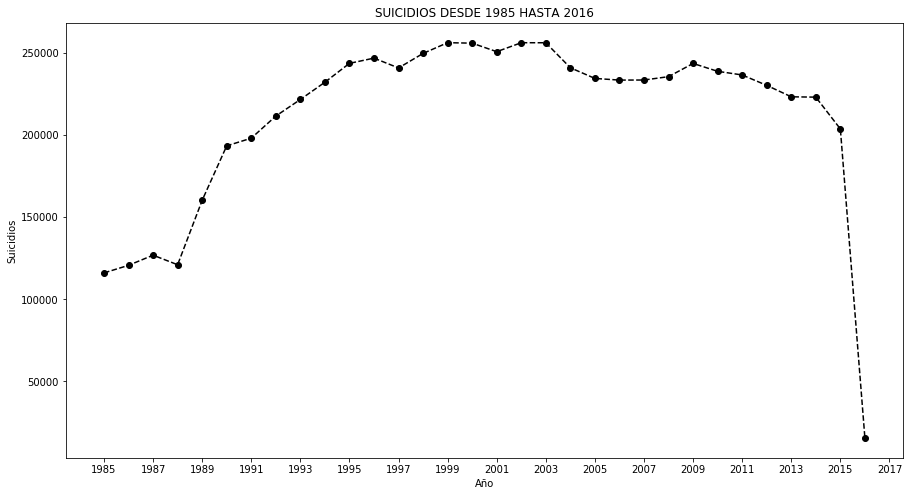

In [12]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(lista.groupby(['year']).suicides_no.sum(),'ko--')
tick = ax.set_xticks(range(1985,2018,2))
ax.set_title('SUICIDIOS DESDE 1985 HASTA 2016')
ax.set_xlabel('Año')
ax.set_ylabel('Suicidios')

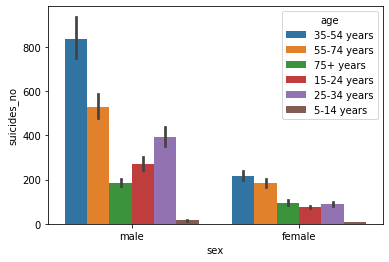

In [25]:
p = sns.barplot(x='sex', y='suicides_no', hue='age', data=lista)

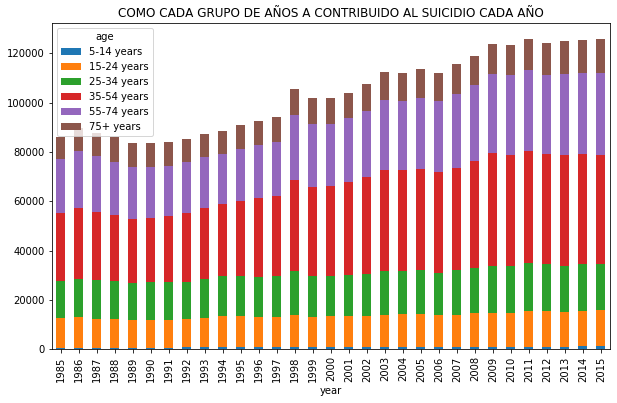

In [27]:
def count_year(group):
    return len(group.year.unique())
country_o = lista.groupby('country').apply(count_year).sort_values(ascending = False)
country_o.name = 'occurances of country'
nmaster = lista[~ (lista.year == 2016)].drop(['HDI for year','country-year','suicides/100k pop'],axis = 1)
coun_year = lista.groupby('country-year').population.sum()
ncountry_o = nmaster.groupby('country').apply(count_year).sort_values(ascending = False)
ncountry_o[country_o >= 30] 
pmaster = nmaster[nmaster.country.isin(ncountry_o[country_o >= 31].index)]
age_group = pd.pivot_table(pmaster,index=['year'],values='suicides_no',columns=['age'],aggfunc=np.sum)
sui_age=age_group[['5-14 years','15-24 years', '25-34 years', '35-54 years','55-74 years', '75+ years']]
sui_age.plot(kind = 'bar',figsize=(10,6),stacked=True,title='COMO CADA GRUPO DE AÑOS A CONTRIBUIDO AL SUICIDIO CADA AÑO')

In [25]:
suicide_sum = lista.groupby('country', sort=False)["suicides_no"].sum().reset_index(name ='total_suicides')
suicide_sum = suicide_sum.sort_values(by="total_suicides", ascending=False)

suicide_sum.head()

,country,total_suicides
58,Russian Federation,1209742
26,United States,1034013
42,Japan,806902
4,France,329127
53,Ukraine,319950


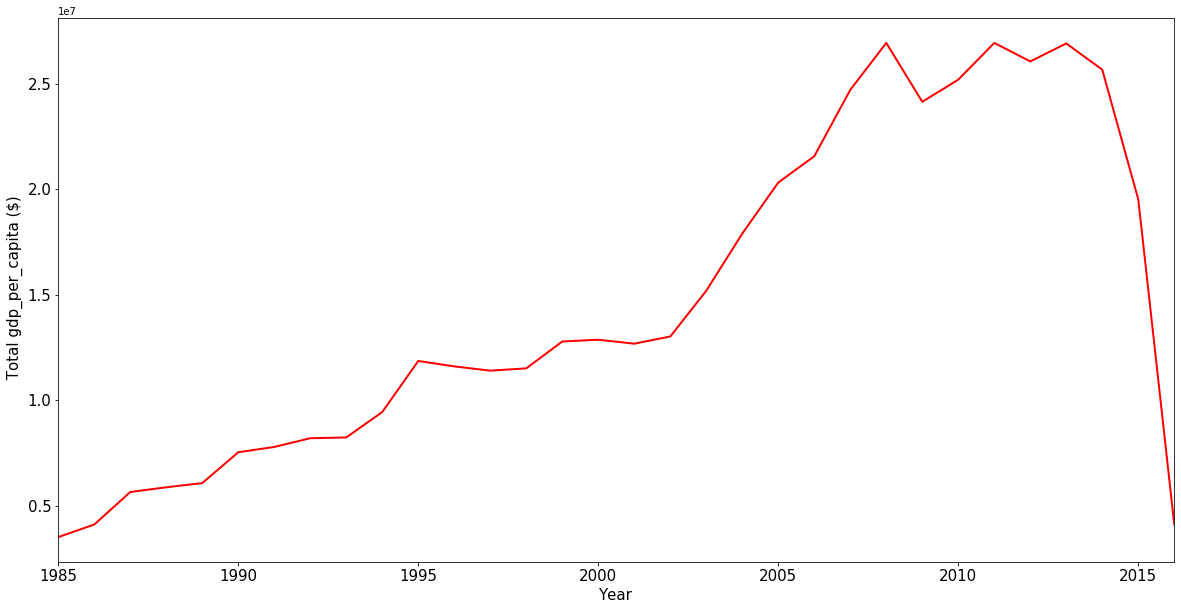

In [27]:
data_gdp = (lista['gdp_per_capita ($)'].groupby(lista.year)).sum()
data_gdp.plot(figsize=(20,10), linewidth=2, fontsize=15,color='red')
plt.xlabel('Year', fontsize=15)
plt.ylabel(' Total gdp_per_capita ($)',fontsize=15)
plt.show()

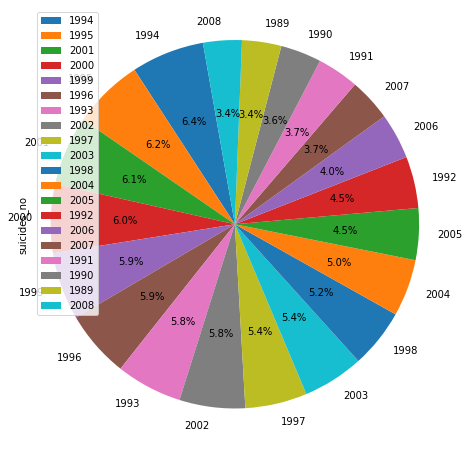

In [32]:
pv_primeros= lista.filter(items = ["year", "suicides_no"]).sort_values('suicides_no', ascending=False).head(20)

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

pv_primeros.plot(kind='pie', y = 'suicides_no', ax=ax1, autopct='%1.1f%%', 
 startangle=100, shadow=False, labels=pv_primeros['year'], fontsize=10)
plt.axis('equal')

# View the plot
plt.show()

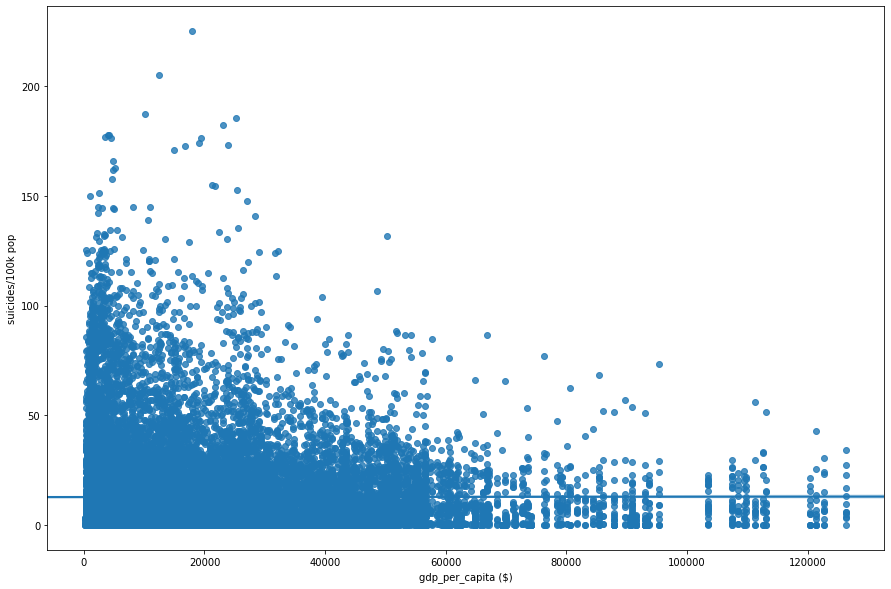

In [28]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.regplot(x='gdp_per_capita ($)', y='suicides/100k pop',data=lista)
plt.show()

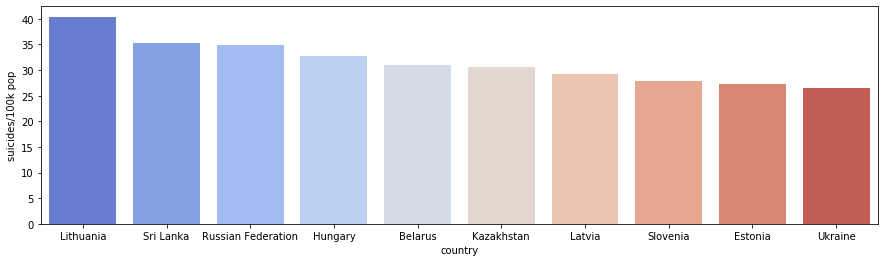

In [29]:
data_suicide_mean = lista['suicides/100k pop'].groupby(lista.country).mean().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10),palette='coolwarm')

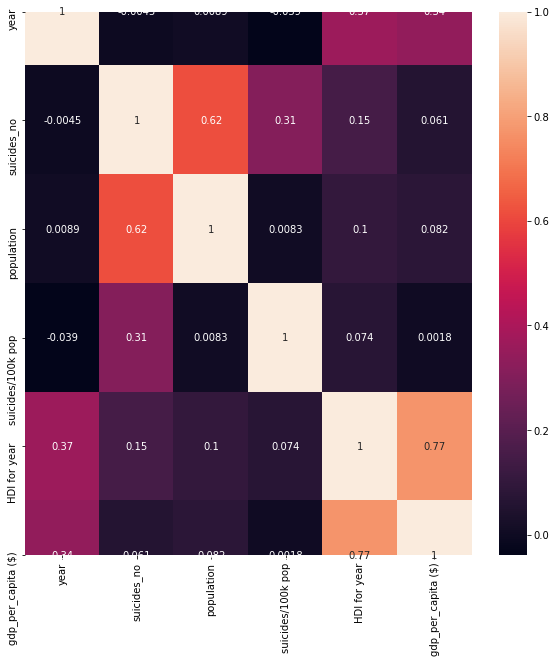

In [28]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.heatmap(lista.corr(),annot=True)
plt.show()

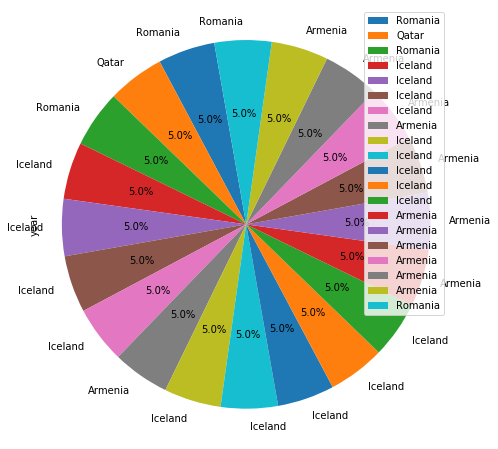

In [35]:
pv_primeros= lista.filter(items = ["country", "year"]).sort_values('year', ascending=False).head(20)

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

pv_primeros.plot(kind='pie', y = 'year', ax=ax1, autopct='%1.1f%%', 
 startangle=100, shadow=False, labels=pv_primeros['country'], fontsize=10)
plt.axis('equal')

# View the plot
plt.show()